# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

In [2]:
! git clone https://www.github.com/DS3001/assignment2
! git clone https://www.github.com/DS3001/visualization





fatal: destination path 'assignment2' already exists and is not an empty directory.
Cloning into 'visualization'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 13 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (13/13), 2.17 MiB | 15.22 MiB/s, done.
Resolving deltas: 100% (2/2), done.


**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1) The paper is about the concept of data tidying, which is a component of data cleaning. The main focus is on presenting tidy datasets, which have a specific structure where each variable is represented as a column, each observation as a row, and each type of observational unit as a table. This structured approach makes datasets easy to manipulate, model, and visualize. The framework provided by tidy datasets simplifies the process of tidying messy datasets since only a limited set of tools is required. Additionally, the paper emphasizes the benefits of having a consistent data structure, which makes it easier to develop analysis tools that both accept and produce tidy datasets.

2) The "tidy data standard" is intended to provide a consistent way to organize data values within a dataset. This standard aims to make initial data cleaning easier by offering a structured approach, so analysts don't have to start from scratch each time. It is designed to facilitate the initial exploration and analysis of the data and to simplify the development of data analysis tools that work seamlessly together. By adhering to this standard, it reduces the need to spend time rearranging the output from one tool to make it compatible with another, allowing for a smoother data analysis process.

3) "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." In the context of the dataset, it suggests that all tidy datasets conform to a certain standard and structure, making them consistently organized. In contrast, messy datasets can be disorganized in various, unique ways, with each having its own set of problems and inconsistencies.

"For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general." his sentence means that when you're looking at a specific dataset, it's typically straightforward to identify which parts represent observations and which parts represent variables. However, when trying to create a broad, overarching definition of what constitutes an "observation" or a "variable" that applies universally to all datasets, it becomes challenging.

4) Values: A dataset is a collection of values, which can be numbers (if quantitative) or strings (if qualitative).

Variables: Every value belongs to a variable. A variable contains all values that measure the same underlying attribute (like height, temperature, duration) across units.

Observations: An observation contains all values measured on the same unit (like a person, or a day, or a race) across attributes.

5) "Tidy Data" is defined in the above text as a standard way of mapping the meaning of a dataset to its structure. In "Tidy Data":Each variable forms a column. Each observation forms a row. Each type of observational unit forms a table.

6) Five most common problems with datasets are:

Column headers are values not variable names

Multiple variables stored in one column

Variables are stored in both rows and columns

Multiple types of obsevational units are stored in the same table

A single observational unit is stored in multiple tables

The data in table 4 is messy because there are variable names in both columns and rows.

"Melting" a dataset is a term often associated with the process of reshaping data, especially in the context of the Python data manipulation library, pandas. The idea is to transform or reshape data from a wide format to a long format.

7) Table 11 is messy because it is of a wide format with missing values. Table 12 is more idy as it is molten down into a long format and has no missing values.

8) The "chicken-and-egg" problem with focusing on tidy data, as highlighted by Hadley Wickham, is about the sequential importance of tidying data versus understanding the data structure. Before you can tidy your data, you need to understand its structure. However, the structure can sometimes be hard to discern in messy datasets. Therefore, you need tools to help diagnose the issues with your data, but many of these tools work best when the data is already tidy.

Hadley Wickham hopes for the development of better diagnostic tools that can assist in understanding the structure of messy datasets, without the immediate need for them to be tidy.




**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [7]:
import pandas as pd


df = pd.read_csv('./assignment2/data/airbnb_hw.csv')

# Define a cleaning function
def clean_price(price_str):
    # Handle missing values
    if pd.isna(price_str) or price_str == " ":
        return None

    # Remove unwanted characters and convert to correct datatype
    cleaned_price = ''.join([ch for ch in str(price_str) if ch.isdigit() or ch == "."])

    # If the cleaned price is an empty string, return None
    if not cleaned_price:
        return None

    return float(cleaned_price)


df['Price'] = df['Price'].apply(clean_price)


missing_values_count = df['Price'].isna().sum()

print(f"Number of missing values in the 'Price' column: {missing_values_count}")


Number of missing values in the 'Price' column: 0
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  10036.0   3.0   

   Number of

In [8]:
import pandas as pd


df = pd.read_csv('./assignment2/data/sharks.csv')


def clean_type(type_str):
    # Handle missing values
    if pd.isna(type_str):
        return None

    # Remove unwanted characters and extra whitespace
    cleaned_type = type_str.strip().replace('\n', '').replace('\r', '')

    # Handle inconsistent capitalization
    cleaned_type = cleaned_type.lower().capitalize()

    # Map synonyms or near-identical categories to a standardized form
    if cleaned_type == 'Apt':
        return 'Apartment'


    return cleaned_type


df['Type'] = df['Type'].apply(clean_type)


missing_values_count = df['Type'].isna().sum()

print(f"Number of missing values in the 'Type' column: {missing_values_count}")



<ipython-input-8-ab7a5aa6ee6a>:4: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./assignment2/data/sharks.csv')


Number of missing values in the 'Type' column: 5


In [13]:
import pandas as pd
import numpy as np


df = pd.read_csv('./visualization/data/pretrial_data.csv')


def clean_dummy_variable(value):
    if value in [0, 1]:
        return value
    else:
        return np.nan


df['released'] = df['released'].apply(clean_dummy_variable)


missing_values_count = df['released'].isna().sum()

print(f"Number of missing or invalid values in the 'released' column: {missing_values_count}")



   Unnamed: 0 case_type   age sex race  is_poor  bond  bond_type  prior_F  \
0           0         F  31.0   M    W      NaN   NaN          7      0.0   
1           1         F  60.0   M    B      NaN   NaN          7     13.0   
2           2         M  27.0   M    W      NaN   NaN          7      0.0   
3           3         M  27.0   M    B      0.0   NaN          7      0.0   
4           4         F  28.0   F    W      0.0   NaN          7      0.0   

   prior_M  gini  released  sentence_type   sentence  bond_NA  held_wo_bail  \
0      0.0  0.44       NaN            NaN        NaN     True         False   
1     21.0  0.44       0.0            0.0  60.000000     True         False   
2      0.0  0.44       0.0            1.0  12.000000     True         False   
3      9.0  0.44       0.0            1.0   0.985626     True         False   
4      0.0  0.44       1.0            4.0   0.000000     True         False   

   sentence_NA  
0         True  
1        False  
2        Fa

In [15]:
import pandas as pd
import numpy as np


df = pd.read_csv('./visualization/data/pretrial_data.csv')

def clean_numerical(value):
    try:
        # Convert to float
        return float(value)
    except ValueError:
        # If conversion fails, return NaN
        return np.nan


df['sentence'] = df['sentence'].apply(clean_numerical)


missing_values_count = df['sentence'].isna().sum()





Number of missing or invalid values in the 'sentence' column: 274


**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('./assignment2/data/college_completion.csv')

# Get the dimensions of the dataset
rows, columns = df.shape

# Print the dimensions
print(f"Total Observations (Rows): {rows}")
print(f"Total Variables (Columns): {columns}")

# Print the list of all variables (column names)
print("\nVariables included in the dataset:")
print(df.columns.tolist())

# Display the first few rows using .head()
print("\nFirst few rows of the dataset:")
print(df.head())

In [20]:
import pandas as pd


df = pd.read_csv('./assignment2/data/college_completion.csv')


# Cross-tabulate 'control' and 'level'
ct = pd.crosstab(df['control'], df['level'])

print(ct)


level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


Private for-profit institutions:

There is a nearly even distribution between 2-year and 4-year programs.
The count for 2-year programs (465) is slightly less than for 4-year programs (527).

Private not-for-profit institutions:

The 4-year programs (1180) dominate in terms of counts, being much higher than the 2-year programs (68).
This indicates that Private not-for-profit institutions tend to offer more 4-year programs compared to 2-year programs.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('./assignment2/data/college_completion.csv')


if 'grad_100_value' not in df.columns:
    print("'grad_100_value' column not found in the dataset!")
else:

    print(df['grad_100_value'].describe())


    fig, ax = plt.subplots(2, 2, figsize=(15, 12))

    # Histogram
    sns.histplot(df['grad_100_value'], bins=30, kde=False, ax=ax[0, 0])
    ax[0, 0].set_title('Histogram of grad_100_value')

    # Kernel Density Plot
    sns.kdeplot(df['grad_100_value'], ax=ax[0, 1])
    ax[0, 1].set_title('Kernel Density Plot of grad_100_value')

    # Boxplot
    sns.boxplot(x=df['grad_100_value'], ax=ax[1, 0])
    ax[1, 0].set_title('Boxplot of grad_100_value')

    plt.tight_layout()
    plt.show()

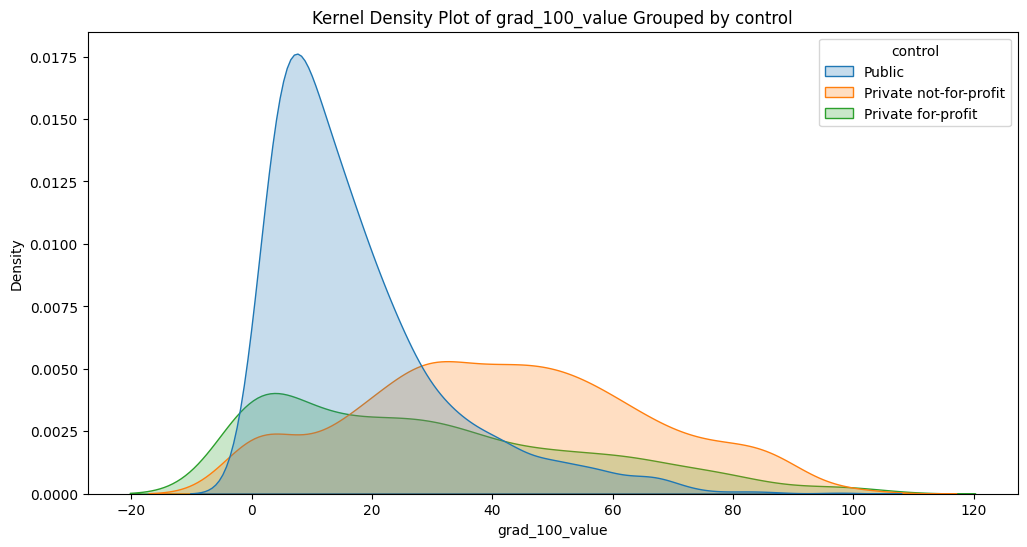

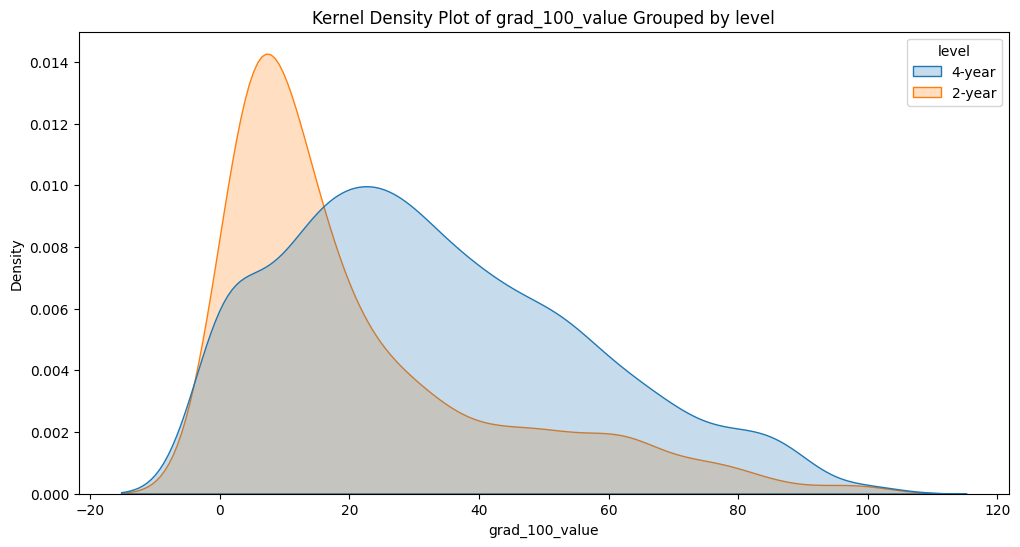

Statistical Description Grouped by control:
                          count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  

Statistical Description Grouped by level:
          count       mean        std  min   25%   50%     75%    max
level                                                               
2-year  1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year  2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('./assignment2/data/college_completion.csv')

# Grouped Kernel Density Plot by control
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='grad_100_value', hue='control', fill=True)
plt.title('Kernel Density Plot of grad_100_value Grouped by control')
plt.show()

# Grouped Kernel Density Plot by level
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='grad_100_value', hue='level', fill=True)
plt.title('Kernel Density Plot of grad_100_value Grouped by level')
plt.show()

# Grouped Statistical Descriptions
grouped_by_control = df.groupby('control')['grad_100_value'].describe()
grouped_by_level = df.groupby('level')['grad_100_value'].describe()

print("Statistical Description Grouped by control:\n", grouped_by_control)
print("\nStatistical Description Grouped by level:\n", grouped_by_level)

4 year private not for profit institutions seem to have the highest graduation rates.

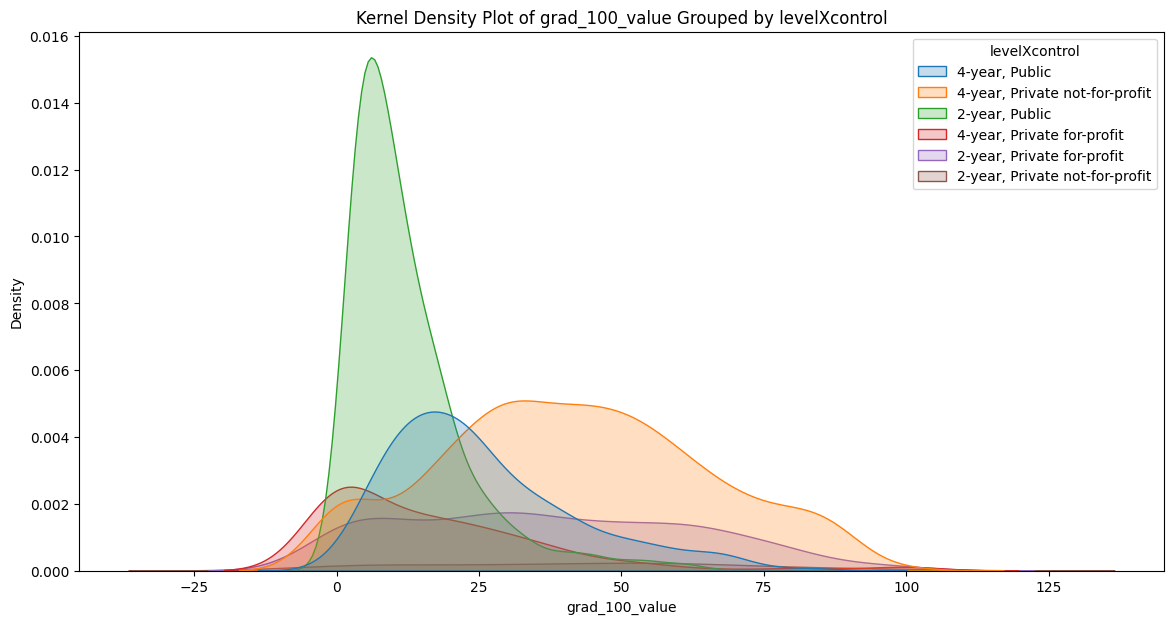

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('./assignment2/data/college_completion.csv')

# Create the interaction variable 'levelXcontrol'
df['levelXcontrol'] = df['level'] + ', ' + df['control']

# Grouped Kernel Density Plot using levelXcontrol
plt.figure(figsize=(14, 7))
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', fill=True)
plt.title('Kernel Density Plot of grad_100_value Grouped by levelXcontrol')
plt.show()

4 year private not for profit institutions seem to have the highest graduation rates.

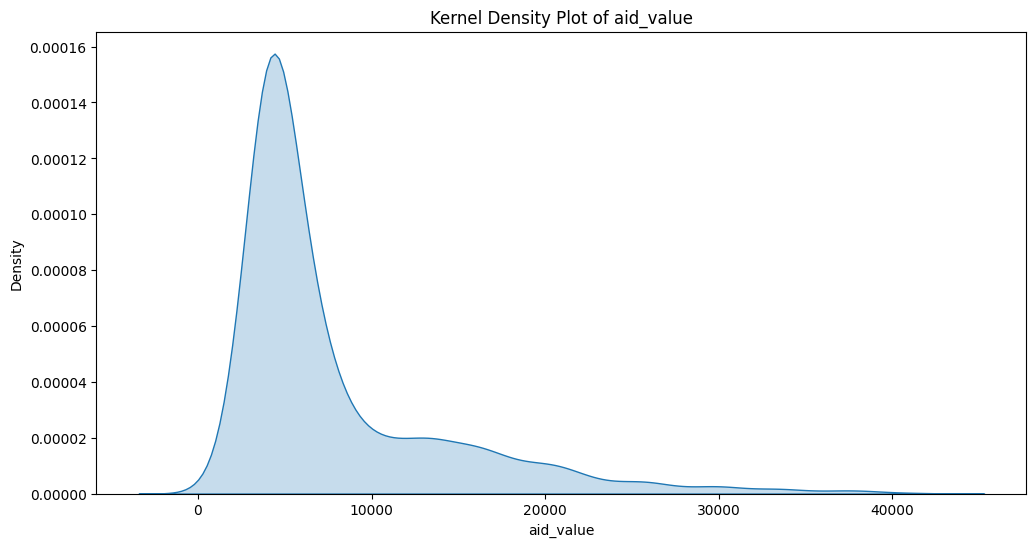

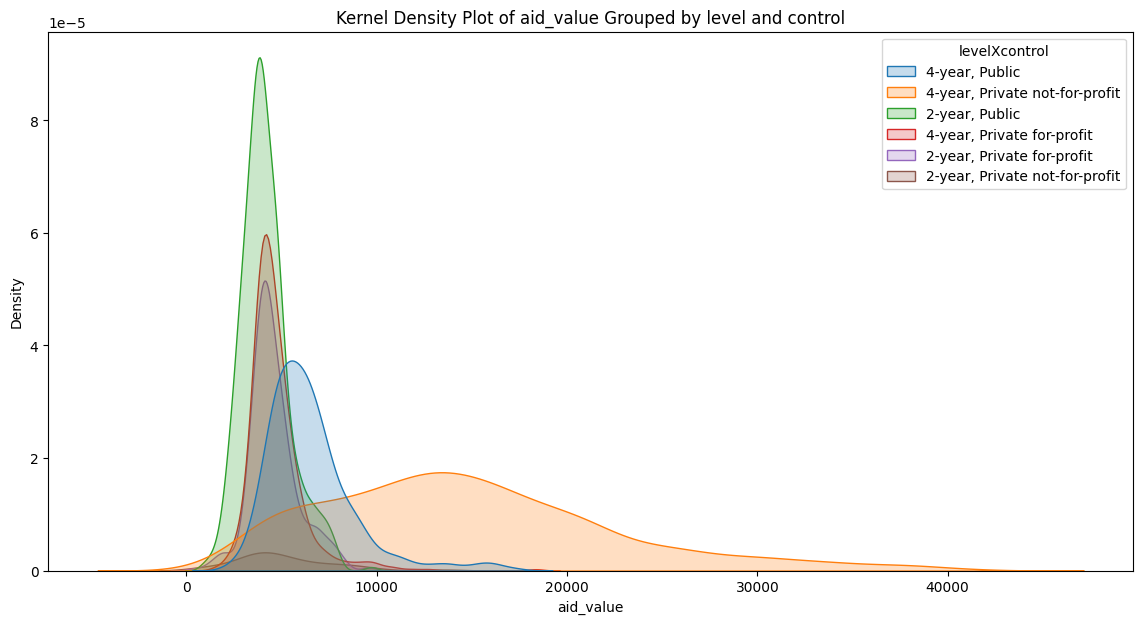

                                count          mean          std     min  \
control                level                                               
Private for-profit     2-year   464.0   4559.681034  1286.688269   294.0   
                       4-year   527.0   4696.062619  1489.410020  1580.0   
Private not-for-profit 2-year    68.0   5128.058824  2590.449946   934.0   
                       4-year  1180.0  14702.401695  7649.775203   902.0   
Public                 2-year   926.0   4126.199784  1260.271382   881.0   
                       4-year   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
control                level                                        
Private for-profit     2-year  3818.75   4286.5   5122.00   9727.0  
                       4-year  3885.50   4364.0   5131.50  18355.0  
Private not-for-profit 2-year  3650.00   4516.5   6311.50  13654.0  
                       4-year  9113.25  13774.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('./assignment2/data/college_completion.csv')
# Kernel Density Plot for aid_value
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='aid_value', fill=True)
plt.title('Kernel Density Plot of aid_value')
plt.show()

# Grouped Kernel Density Plot by level and control using interaction term
df['levelXcontrol'] = df['level'] + ', ' + df['control']
plt.figure(figsize=(14, 7))
sns.kdeplot(data=df, x='aid_value', hue='levelXcontrol', fill=True)
plt.title('Kernel Density Plot of aid_value Grouped by level and control')
plt.show()

# Grouped Statistical Descriptions
grouped_by_control_and_level = df.groupby(['control', 'level'])['aid_value'].describe()
print(grouped_by_control_and_level)






The bimodal nature might be due to differences in these groups. For instance, if a particular combination of level and control has a peak at one value of aid_value and another combination has a peak at a different value, this would create a bimodal distribution when combining the data.

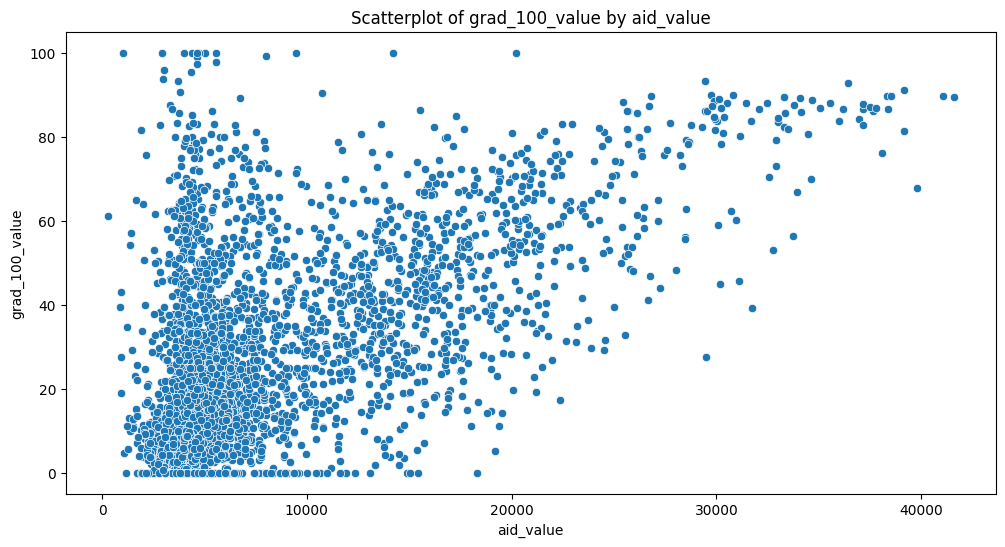

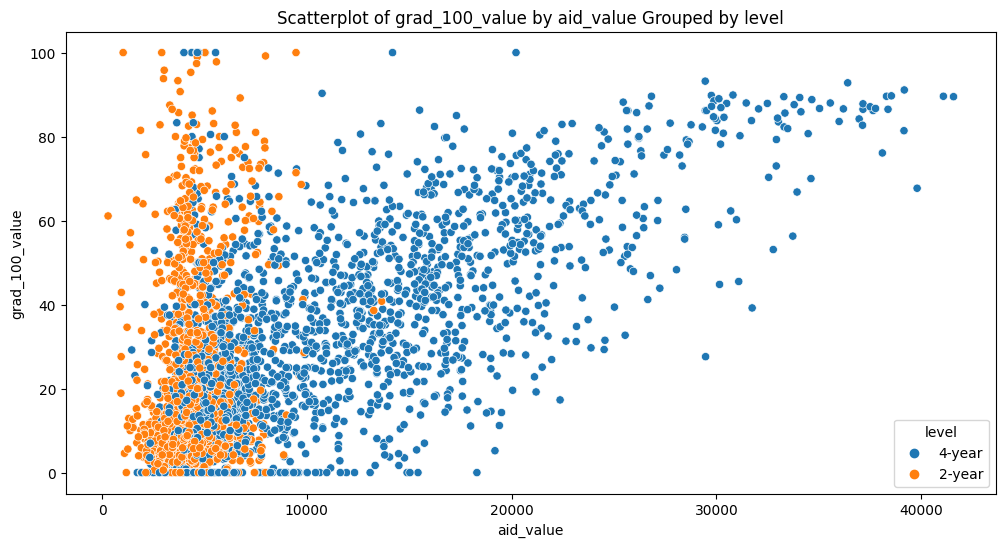

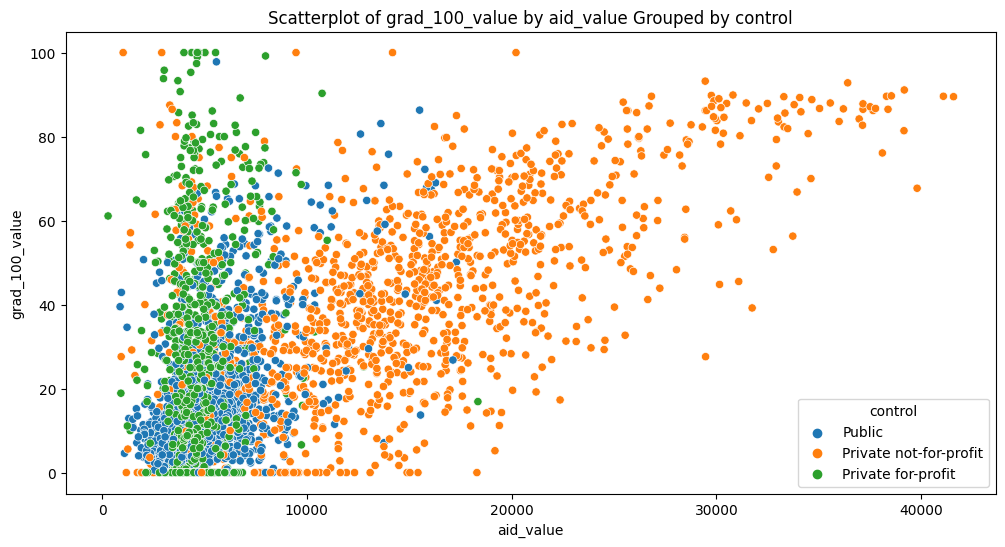

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('./assignment2/data/college_completion.csv')

# Scatterplot of grad_100_value by aid_value
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value')
plt.title('Scatterplot of grad_100_value by aid_value')
plt.show()

# Scatterplot of grad_100_value by aid_value grouped by level
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='level')
plt.title('Scatterplot of grad_100_value by aid_value Grouped by level')
plt.show()

# Scatterplot of grad_100_value by aid_value grouped by control
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='control')
plt.title('Scatterplot of grad_100_value by aid_value Grouped by control')
plt.show()

First Scatterplot: The general trend will indicate how aid impacts graduation rates across all institutions. there's an upwards trend, which generally means that as aid increases, graduation rates also increase.

Scatterplot Grouped by level: By examining the scatterplot colors, you can see certain levels of institutions have a more pronounced correlation between aid and graduation rates.

Scatterplot Grouped by control: Similarly, this plot will let you infer if private/public or for-profit/non-profit institutions show a different pattern regarding the correlation between aid and graduation rates.

4 year private not for profit seems to have increased graduation rates with increased aid

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.